In [33]:
# For Data Processing
import numpy as np
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import plotly.figure_factory as ff
import plotly.express as px
import cufflinks as cf
import yfinance as yf
plt.style.use('dark_background')
%matplotlib inline

import math
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Data Collection/Processing: 

In [34]:
start_date = date.today()-relativedelta(years=4)
end_date = date.today() 
print("Capturing stock data from", start_date, "to", end_date)

company_list = ['AAPL', 'F', 'GOOG', 'NVDA', 'TSLA', 'META']
stocks = yf.download(company_list, start="2016-01-01", end="2021-01-01")['Close']
print(stocks)


Capturing stock data from 2019-01-31 to 2023-01-31
[*********************100%***********************]  6 of 6 completed
                                 AAPL      F       GOOG        META  \
Date                                                                  
2016-01-04 00:00:00-05:00   26.337500  13.97  37.091999  102.220001   
2016-01-05 00:00:00-05:00   25.677500  13.72  37.129002  102.730003   
2016-01-06 00:00:00-05:00   25.174999  13.11  37.181000  102.970001   
2016-01-07 00:00:00-05:00   24.112499  12.70  36.319500   97.919998   
2016-01-08 00:00:00-05:00   24.240000  12.54  35.723499   97.330002   
...                               ...    ...        ...         ...   
2020-12-24 00:00:00-05:00  131.970001   8.86  86.942497  267.399994   
2020-12-28 00:00:00-05:00  136.690002   8.89  88.804497  277.000000   
2020-12-29 00:00:00-05:00  134.869995   8.82  87.935997  276.779999   
2020-12-30 00:00:00-05:00  133.720001   8.86  86.975998  271.869995   
2020-12-31 00:00:00-05:00  1

# Data Exploration: Exploring the Dataset


* references:
    * https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
    * https://www.fool.com/knowledge-center/how-to-calculate-a-monthly-return-on-investment/#:~:text=Take%20the%20ending%20balance%2C%20and,corresponds%20to%20your%20monthly%20return.
    * https://www.investopedia.com/terms/i/intraday-return.asp#:~:text=How%20Is%20Daily%20Return%20Calculated,price%2C%20then%20multiply%20by%20100. 


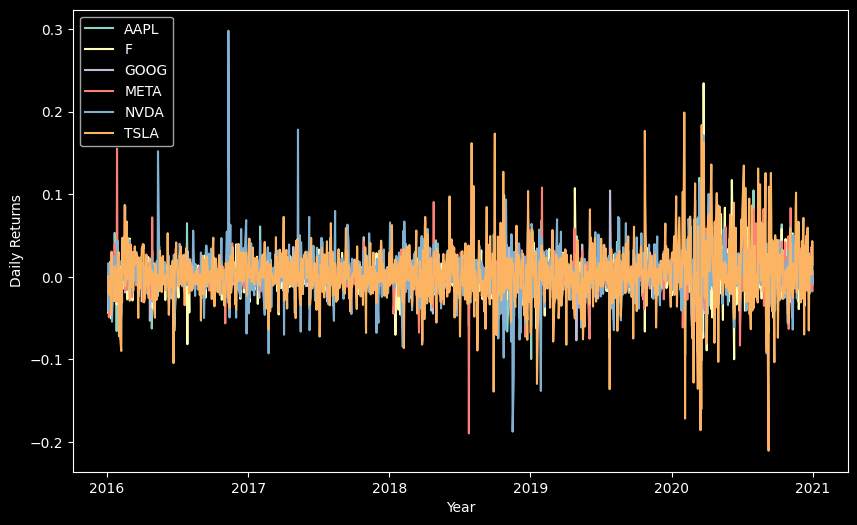

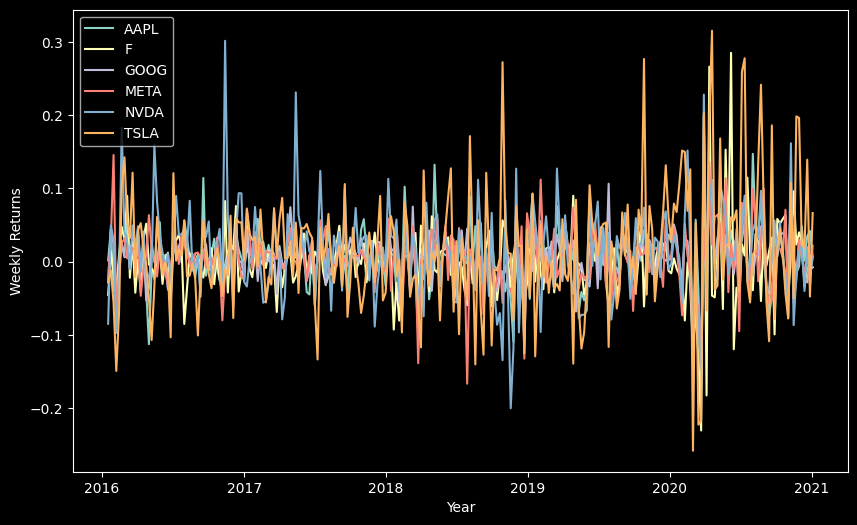

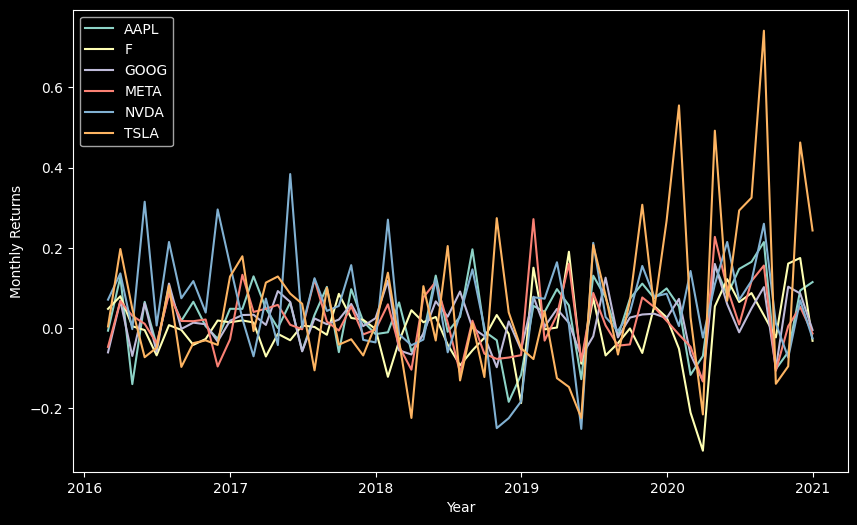

In [13]:
daily_returns = stocks.pct_change()
weekly_returns = stocks.resample('W').last().pct_change()
monthly_returns = stocks.resample('M').last().pct_change()


plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(daily_returns[stock], label=stock)
plt.xlabel('Year')
plt.ylabel('Daily Returns')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(weekly_returns[stock], label=stock)
plt.xlabel('Year')
plt.ylabel('Weekly Returns')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(monthly_returns[stock], label=stock)
plt.xlabel('Year')
plt.ylabel('Monthly Returns')
plt.legend(loc='upper left')
plt.show()

<AxesSubplot: title={'center': 'Meta Historical Price Chart'}, xlabel='Date', ylabel='Closing Price'>

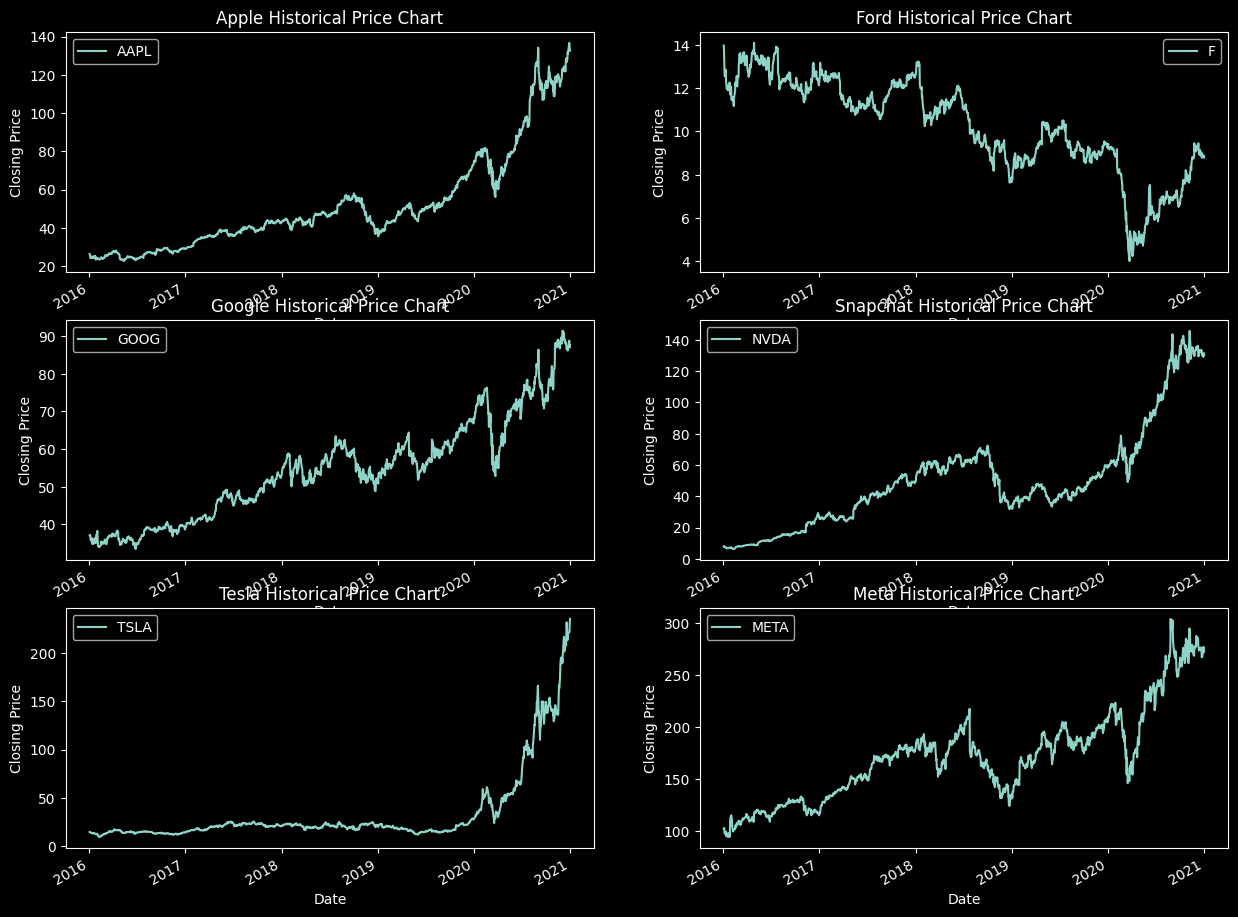

In [14]:
# Let's see a historical view of the closing prices
['AAPL', 'F', 'GOOG', 'NVDA', 'TSLA', 'META']

figure, axis = plt.subplots(3, 2)
stocks['AAPL'].plot(ax=axis[0,0],xlabel="Date", ylabel="Closing Price", 
                      title="Apple Historical Price Chart" ,legend=True, figsize=(15,12))

stocks['F'].plot(ax=axis[0,1],xlabel="Date", ylabel="Closing Price", 
                      title="Ford Historical Price Chart" ,legend=True, figsize=(15,12))

stocks['GOOG'].plot(ax=axis[1,0],xlabel="Date", ylabel="Closing Price", 
                      title="Google Historical Price Chart" ,legend=True, figsize=(15,12))

stocks['NVDA'].plot(ax=axis[1,1],xlabel="Date", ylabel="Closing Price", 
                      title="Snapchat Historical Price Chart" ,legend=True, figsize=(15,12))

stocks['TSLA'].plot(ax=axis[2,0],xlabel="Date", ylabel="Closing Price", 
                      title="Tesla Historical Price Chart" ,legend=True, figsize=(15,12))

stocks['META'].plot(ax=axis[2,1],xlabel="Date", ylabel="Closing Price", 
                      title="Meta Historical Price Chart" ,legend=True, figsize=(15,12))


Test RMSE: 2.096


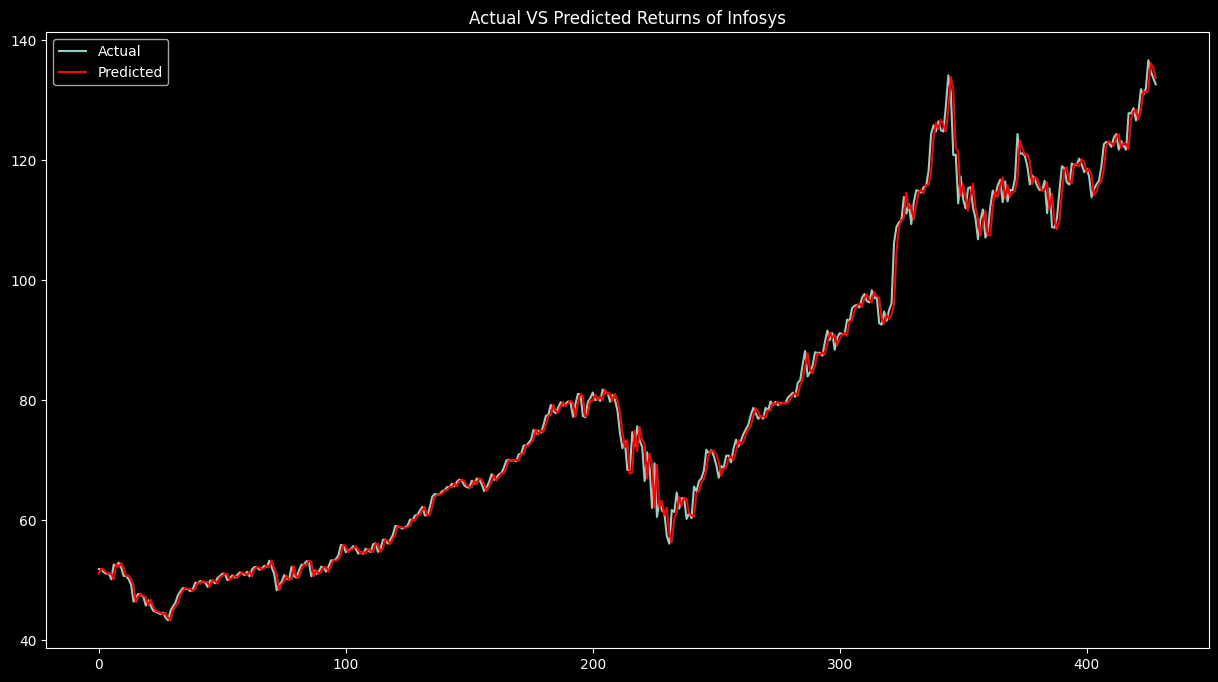

In [23]:
#Solution implementation

from statsmodels.tsa.arima.model import ARIMA

['AAPL', 'F', 'GOOG', 'NVDA', 'TSLA', 'META']

# split into train and test sets
X = stocks["AAPL"].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))


# evaluate forecasts
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [35]:
close_prices = stocks['AAPL']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))




model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_10 (Dense)            (None, 25)                2525      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
948/948 [==============================] - 26s 24ms/step - loss: 4.7885e-04
Epoch 2/3
948/948 [==============================] - 23s 24ms/step - loss: 2.2748e-04
Epoch 3/

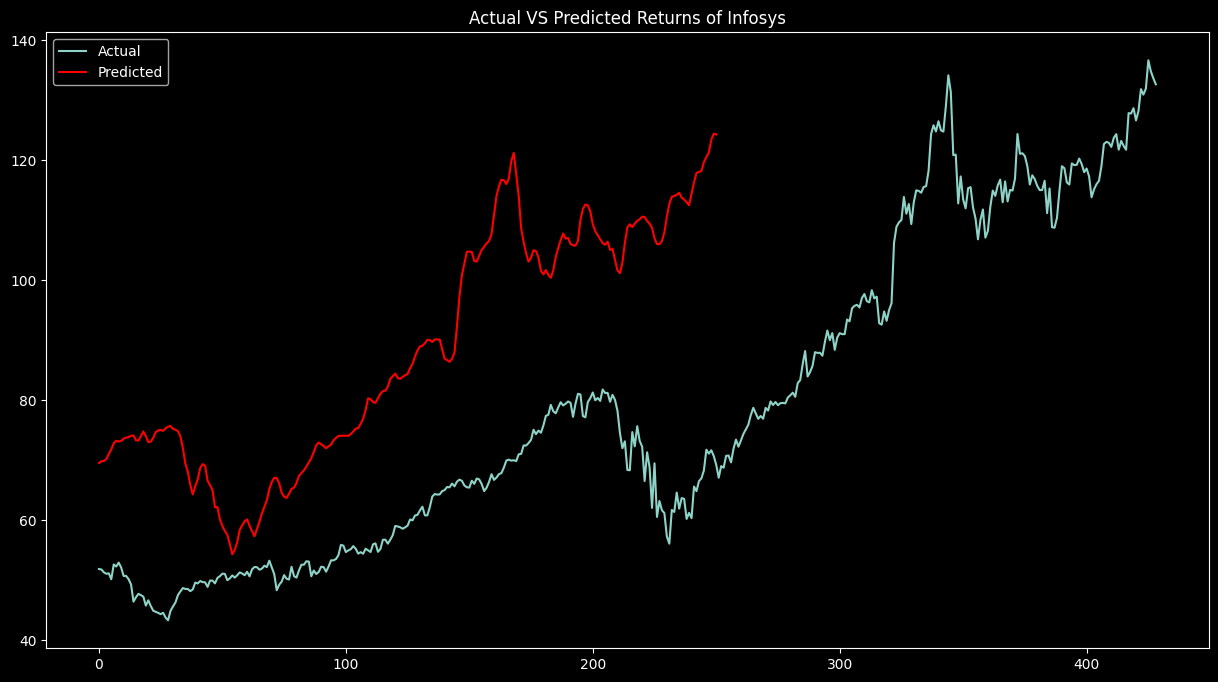

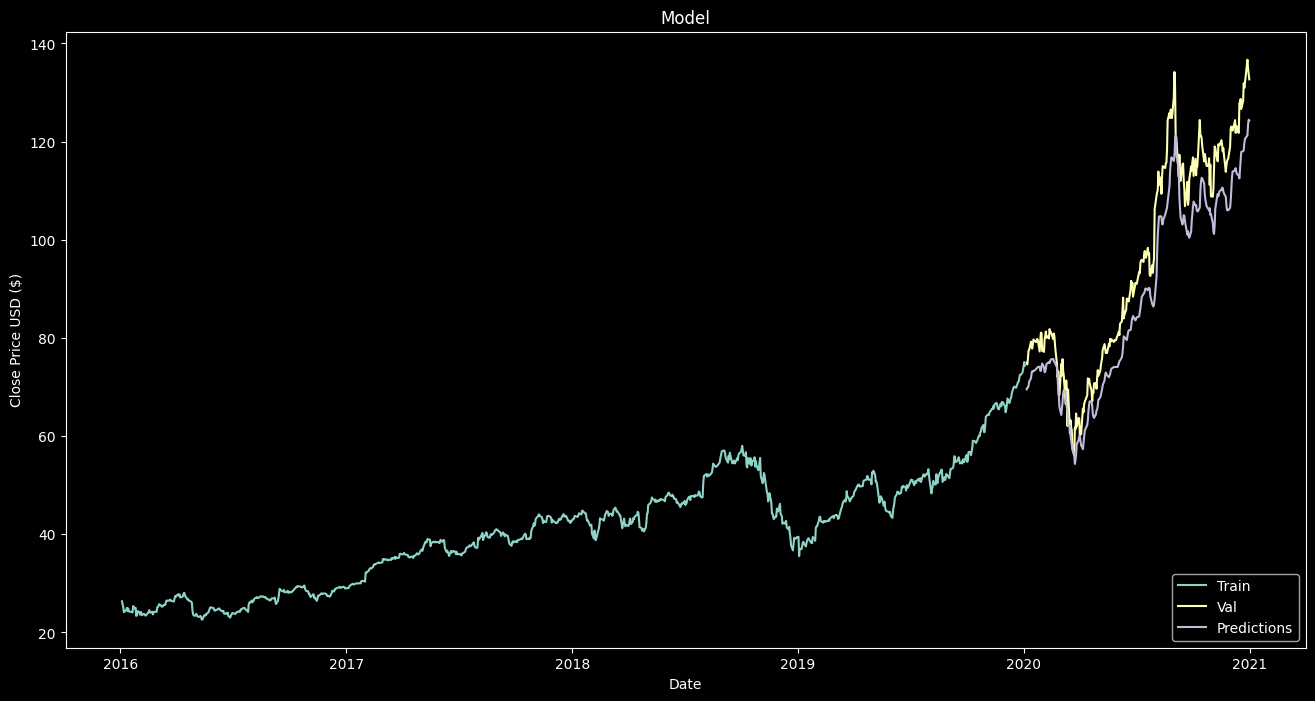

In [45]:
# plot forecasts against actual outcomes
# Visualization Code for ARIMA 
from matplotlib import pyplot
pyplot.figure(figsize=(15,8))
pyplot.plot(test, label="Actual")
pyplot.plot(predictions, color='red', label="Predicted")
pyplot.legend()
pyplot.title("Actual VS Predicted Returns of Infosys")
pyplot.show()


# Visualization Code for LSTM 
data = stocks['AAPL']
data = data.to_frame()
data.rename(columns = {0: 'Close'}, inplace=True)
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['AAPL', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


The code shows two models for stock price prediction, ARIMA and LSTM. ARIMA uses historical stock prices to make predictions, trained on 66% of data and tested on the remaining 34%. LSTM takes into account previous 60 time steps to predict stock prices, trained on 80% of data and tested on the remaining 20%. ARIMA models are simple to implement but limited in handling non-linear relationships, while LSTM models are more complex but handle non-linear relationships well. The choice of model depends on the specific use case and desired outcome.